<a href="https://colab.research.google.com/github/Hlompho-Dash/first_try_of_fastai/blob/master/01_matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

from google.colab import drive
drive.mount('/content/gdrive')

os.chdir('/content/gdrive/MyDrive/first_try_of_fastai')

print("------------------------------------------------------------------")

Mounted at /content/gdrive
------------------------------------------------------------------


In [ ]:
print(os.getcwd())

/content/gdrive/My Drive/first_try_of_fastai


In [ ]:
#export
from exp.nb_00 import *
import operator

def test(a,b,cmp, cname=None):
  if cname is None: cname = cmp.__name__
  assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,"==")


In [ ]:
test_eq(TEST,"test")

In [ ]:
 #export

from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = "http://deeplearning.net/data/mnist/mnist.pkl"

In [25]:
#path = datasets.download_data(MNIST_URL)
#path

path1 = "/content/gdrive/MyDrive/first_try_of_fastai/mnist.pkl.gz"
path2 = "/content/gdrive/MyDrive/first_try_of_fastai/mnist (1).pkl.gz"

In [27]:
with gzip.open(path2, "rb") as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding = "latin-1")

In [33]:
??tensor

In [34]:
x_train,y_train,x_valid,y_vlaid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape,y_train, y_train.shape, y_train.min(),y_train.max()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [37]:
assert n==y_train.shape[0]==50000

test_eq(c,28*28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

In [40]:
mpl.rcParams["image.cmap"] = "gray"

In [41]:
img = x_train[0]

In [43]:
img.view(28,28).type()

'torch.FloatTensor'

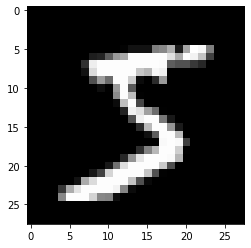

In [51]:
plt.imshow(img.view(28,28))

**Initial Python model**

y = Ax + B MODEL

In [52]:
weights = torch.randn(784,10)

In [53]:
bias = torch.zeros(10)

In [55]:
def matmul(a,b):
  ar,ac = a.shape
  br,bc = b.shape

  assert ac==br
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
      for k in range(ac):
        c[i,j] += a[i,k] * b[k,j]
  return c

In [56]:
m1 = x_valid[:5]
m2 = weights

In [57]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [58]:
%time t1=matmul(m1,m2)

CPU times: user 803 ms, sys: 0 ns, total: 803 ms
Wall time: 810 ms


In [59]:
t1.shape

torch.Size([5, 10])

In [61]:
a = tensor([10,6,-4])
b = tensor([2,8,7])

a,b

(tensor([10,  6, -4]), tensor([2, 8, 7]))

In [62]:
a + b

tensor([12, 14,  3])

In [63]:
(a < b).float().mean()

tensor(0.6667)

In [67]:
m = tensor([[1.,2,3],[4,5,6],[7,8,9]])
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Check out https://course19.fast.ai/videos/?lesson=8 at 48:09 to see how to write latex in jupyter notebooks. 

Go to the wiki page of the equation an copy and paste the equation in latex into jupyter notebook 

like below:

$$\|A\|_{F}={\sqrt {\operatorname {spur} \left(A^{H}A\right)}}={\sqrt {\operatorname {spur} \left(AA^{H}\right)}}=\|A^{H}\|_{F}$$

$$\|A\|_{\text{F}}={\sqrt {\sum _{i=1}^{m}\sum _{j=1}^{n}|a_{ij}|^{2}}}={\sqrt {\operatorname {trace} \left(A^{*}A\right)}}={\sqrt {\sum _{i=1}^{\min\{m,n\}}\sigma _{i}^{2}(A)}},$$


or on archix you can click download source and it will give you the original TEX file for the paper then your can just copy the equation

In [69]:
(m*m).sum().sqrt()

tensor(16.8819)

**ELEMENT WISE MULTIPLICATION AND SUMMATION**

In [73]:
def matmul(a,b):
  ar,ac = a.shape
  br,bc = b.shape

  assert ac==br
  c = torch.zeros(ar, bc)
  for i in range(ar):
    for j in range(bc):
        c[i,j] = (a[i,:] * b[:,j]).sum()
  return c

In [75]:
%timeit -n 1 _=matmul(m1,m2)

1 loop, best of 3: 2.18 ms per loop


In [79]:
%time _= matmul(m1,m2)

CPU times: user 2.77 ms, sys: 152 µs, total: 2.92 ms
Wall time: 6.44 ms


In [80]:
890.1/5

178.02